<a href="https://colab.research.google.com/github/MientusJJ/Python-Exercises/blob/main/Kopia_notatnika_Z06_F_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lasso Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [ ]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

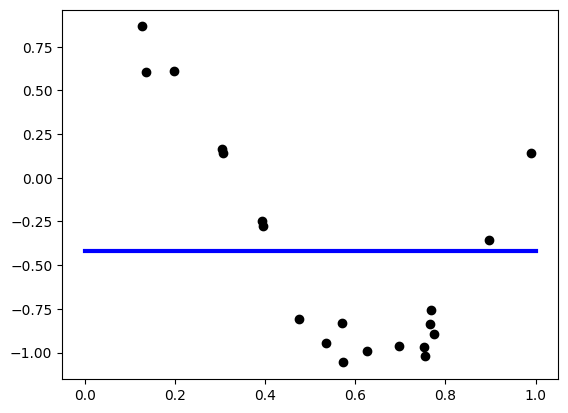

In [ ]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


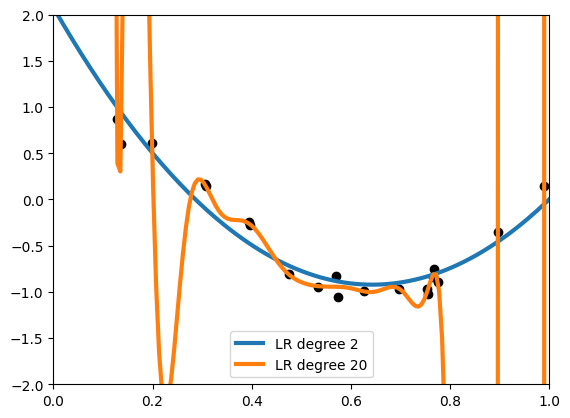

In [ ]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

In [ ]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

In [ ]:
model = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model.fit(x, y)
y_pred = model.predict(x)

In [ ]:
lasso_model_1 = make_pipeline(PolynomialFeatures(20), Lasso(alpha=1))
lasso_model_1.fit(x, y)
y_lasso_pred_1 = lasso_model_1.predict(x)

lasso_model_2 = make_pipeline(PolynomialFeatures(20), Lasso(alpha=10000))
lasso_model_2.fit(x, y)
y_lasso_pred_2 = lasso_model_2.predict(x)

lasso_model_3 = make_pipeline(PolynomialFeatures(20), Lasso(alpha=0.0001))
lasso_model_3.fit(x, y)
y_lasso_pred_3 = lasso_model_3.predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e-02, tolerance: 1.141e-03
  model = cd_fast.enet_coordinate_descent(


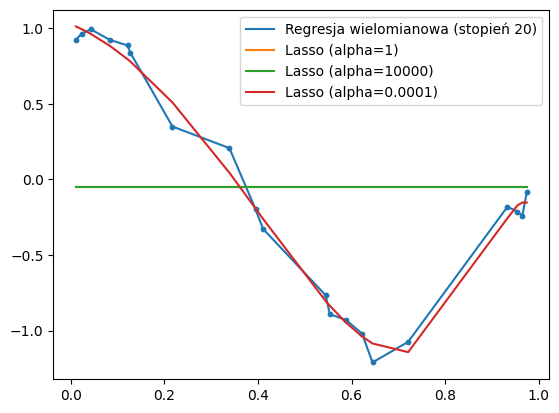

In [ ]:
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, label='Regresja wielomianowa (stopień 20)')
plt.plot(x, y_lasso_pred_1, label='Lasso (alpha=1)')
plt.plot(x, y_lasso_pred_2, label='Lasso (alpha=10000)')
plt.plot(x, y_lasso_pred_3, label='Lasso (alpha=0.0001)')
plt.legend()
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
kfold = model_selection.KFold(n_splits=10, random_state=None)
grid = GridSearchCV(make_pipeline(PolynomialFeatures(), Lasso(max_iter=100000)),
                    param_grid,
                    cv=kfold,
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
grid.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.483e-04, tolerance: 7.435e-04
  model = cd_fast.enet_coordinate_descent(


{'lasso__alpha': 0.0001, 'polynomialfeatures__degree': 11}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [ ]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']].values
y = df_adv['sales'].values
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
param_grid = {'polynomialfeatures__degree': np.arange(1, 21),
              'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# tworzenie modelu regresji Ridge
ridge_model = make_pipeline(PolynomialFeatures(), Lasso(100000))

# ustawienie GridSearchCV i dopasowanie do danych
grid = GridSearchCV(ridge_model, param_grid, cv=50)
grid.fit(X, y)

# wypisanie najlepszych parametrów
print("Najlepsze parametry: ", grid.best_params_)

# wyliczenie R2 score dla najlepszego modelu
y_pred = grid.predict(X)
r2 = r2_score(y, y_pred)
print("R2 score dla najlepszego modelu: ", r2)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.932e+01, tolerance: 5.265e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.498e+01, tolerance: 5.296e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increa

Najlepsze parametry:  {'lasso__alpha': 0.1, 'polynomialfeatures__degree': 3}
R2 score dla najlepszego modelu:  0.9914869731209236


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.357e+01, tolerance: 5.265e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.457e+01, tolerance: 5.417e-01
  model = cd_fast.enet_coordinate_descent(
